In [45]:
from src.helpers.experiment import create_tsfresh_dataframe
from src.helpers.diabetes.cega import clarke_error_grid
from src.helpers.diabetes.madex import mean_adjusted_exponent_error
from pycaret.regression import setup, create_model, compare_models, predict_model
from loguru import logger
import warnings
import numpy as np
from sklearn.metrics import mean_squared_error
import pandas

In [46]:
train_parameters = {
    'ohio_no': 588,
    'scope': 'train',
    'train_ds_size': 0,
    'window_size': 6,
    'prediction_horizon': 3,
    'minimal_features': False,
}

unseen_data_parameters = {
    'ohio_no': 588,
    'scope': 'test',
    'train_ds_size': 0,
    'window_size': 6,
    'prediction_horizon': 3,
    'minimal_features': False,
}

# output = run_experiment(parameters, test_parameters)

2021-07-03 12:47:03.400 | INFO     | src.helpers.experiment:create_ds_name:12 - dataframes/588_train_0_6_3.pkl
2021-07-03 12:47:03.497 | INFO     | src.helpers.experiment:create_tsfresh_dataframe:19 - {'ohio_no': 588, 'scope': 'train', 'train_ds_size': 0, 'window_size': 6, 'prediction_horizon': 3, 'minimal_features': False}


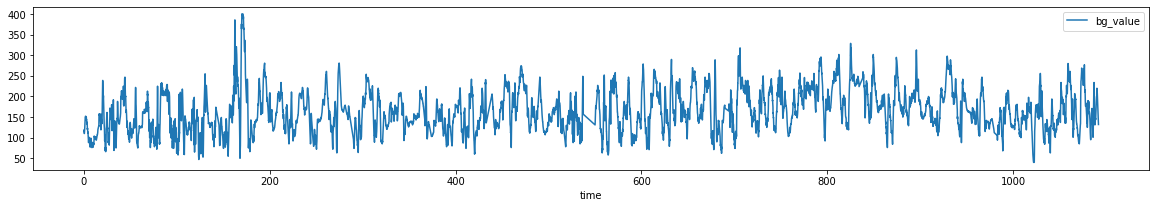

2021-07-03 12:47:03.863 | INFO     | src.helpers.experiment:create_tsfresh_dataframe:22 - Found existing picle file. Continuing...
2021-07-03 12:47:03.863 | INFO     | src.helpers.dataframe:read_df:11 - Attempting to read from pickle file dataframes/588_train_0_6_3.pkl


In [47]:
source_df = create_tsfresh_dataframe(train_parameters)
clean_df = source_df.drop(
    columns=['start', 'end', 'start_time', 'end_time'])

In [48]:
regressor = setup(clean_df,
    target='label',
    feature_selection=True,
    html=True,
    silent=True,
    session_id=1974
    )

,Description,Value
0,session_id,1974
1,Target,label
2,Original Data,"(12632, 788)"
3,Missing Values,True
4,Numeric Features,260
5,Categorical Features,527
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(8842, 235)"


In [49]:
best3 = compare_models(
    exclude=['catboost', 'xgboost'],
    sort='RMSE',
    n_select=3,
    verbose=True
)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,9.2563,189.5988,13.7647,0.9258,0.0945,0.0625,4.2750
et,Extra Trees Regressor,9.2264,190.8153,13.8061,0.9254,0.0942,0.0622,7.5240
lightgbm,Light Gradient Boosting Machine,9.2238,190.9047,13.8109,0.9254,0.0944,0.0621,0.4400
rf,Random Forest Regressor,9.1968,192.1035,13.8514,0.9249,0.0951,0.0623,11.8800
omp,Orthogonal Matching Pursuit,9.3218,197.3553,14.0424,0.9227,0.0968,0.0631,0.0380
lasso,Lasso Regression,9.4145,207.0692,14.3835,0.9190,0.1000,0.0638,0.3310
en,Elastic Net,9.4482,217.3251,14.7123,0.9151,0.1089,0.0639,0.3120
br,Bayesian Ridge,9.4824,234.6449,15.2145,0.9085,0.1027,0.0640,0.1180
ridge,Ridge Regression,9.5068,250.8683,15.6764,0.9022,0.1028,0.0638,0.0250
knn,K Neighbors Regressor,12.4791,332.1972,18.2025,0.8703,0.1231,0.0844,0.3750


In [50]:
best3

[GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                           init=None, learning_rate=0.1, loss='ls', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1974, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0, warm_start=False),
 ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.0,
                     min_impurity_split=None, min_samples_leaf=1,
                     min_samples_split=2, m

In [51]:
master_output = {}

In [52]:
def run_model(model_to_run):
    output = {}
    model = create_model(model_to_run)
    model_name = model.__str__().split('(')[0]
    logger.info(f'Processing model: {model_name}')
    output['model'] = model
    output['model_name'] = model_name
    pd = predict_model(model)
    (_, res) = clarke_error_grid(pd['label'], pd['Label'], 'Test')
    output['internal_cga_analysis'] = res
    rmse = np.sqrt(mean_squared_error(pd['label'], pd['Label']))
    rmadex = np.sqrt(mean_adjusted_exponent_error(
        pd['label'], pd['Label']))
    output['internal_rmse'] = rmse
    output['internal_rmadex'] = rmadex

    unseen_df = create_tsfresh_dataframe(unseen_data_parameters)
    clean_unseen_df = unseen_df.drop(
        columns=['start', 'end', 'start_time', 'end_time'])
    unseen_pd = predict_model(model, data=clean_unseen_df)
    (_, res) = clarke_error_grid(unseen_pd['label'], unseen_pd['Label'], 'Test')
    output['unseen_cga_analysis'] = res
    rmse = np.sqrt(mean_squared_error(unseen_pd['label'], unseen_pd['Label']))
    rmadex = np.sqrt(mean_adjusted_exponent_error(
        unseen_pd['label'], unseen_pd['Label']))
    output['unseen_rmse'] = rmse
    output['unseen_rmadex'] = rmadex
    logger.info(output)
    master_output[model_name] = output
    # df_array.append()
    

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,8.9675,179.8398,13.4104,0.9280,0.0944,0.0618
1,9.3309,192.6058,13.8783,0.9303,0.0971,0.0643
2,9.4836,201.7068,14.2024,0.9154,0.1006,0.0670
3,9.6234,209.5550,14.4760,0.9233,0.0979,0.0634
4,9.2008,174.8350,13.2225,0.9293,0.0917,0.0617
5,9.2300,182.1535,13.4964,0.9353,0.0926,0.0629
6,8.7691,183.5239,13.5471,0.9240,0.0909,0.0573
7,9.3407,189.3101,13.7590,0.9259,0.0916,0.0617
8,9.0215,185.9540,13.6365,0.9276,0.0908,0.0601
9,9.5957,196.5042,14.0180,0.9189,0.0972,0.0653


2021-07-03 12:53:33.881 | INFO     | __main__:run_model:5 - Processing model: GradientBoostingRegressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,9.3583,189.3636,13.7609,0.9246,0.0967,0.0638


2021-07-03 12:53:34.210 | INFO     | src.helpers.experiment:create_ds_name:12 - dataframes/588_test_0_6_3.pkl
2021-07-03 12:53:34.229 | INFO     | src.helpers.experiment:create_tsfresh_dataframe:19 - {'ohio_no': 588, 'scope': 'test', 'train_ds_size': 0, 'window_size': 6, 'prediction_horizon': 3, 'minimal_features': False}


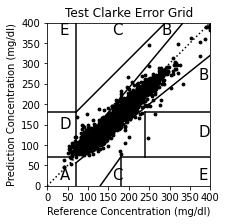

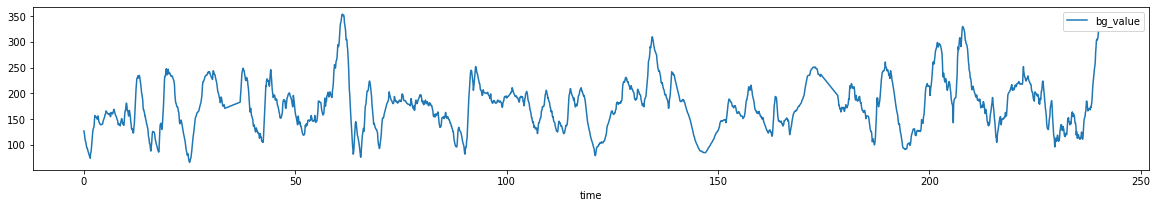

2021-07-03 12:53:34.499 | INFO     | src.helpers.experiment:create_tsfresh_dataframe:22 - Found existing picle file. Continuing...
2021-07-03 12:53:34.500 | INFO     | src.helpers.dataframe:read_df:11 - Attempting to read from pickle file dataframes/588_test_0_6_3.pkl
2021-07-03 12:53:35.532 | INFO     | __main__:run_model:28 - {'model': GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1974, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=F

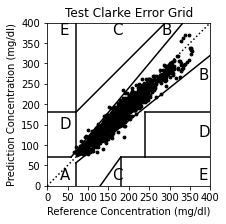

In [53]:
run_model(best3[0])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,8.9550,181.4835,13.4716,0.9273,0.0966,0.0631
1,9.2648,191.5855,13.8414,0.9307,0.0984,0.0645
2,9.4065,198.6620,14.0948,0.9167,0.0970,0.0650
3,9.7680,220.8528,14.8611,0.9192,0.0977,0.0636
4,9.1907,176.2552,13.2761,0.9288,0.0931,0.0622
5,9.0561,183.2074,13.5354,0.9349,0.0935,0.0618
6,8.8654,177.9840,13.3411,0.9263,0.0879,0.0576
7,9.1768,188.7348,13.7381,0.9261,0.0901,0.0603
8,9.0158,187.0990,13.6784,0.9272,0.0910,0.0597
9,9.5650,202.2890,14.2228,0.9165,0.0970,0.0647


2021-07-03 12:54:57.565 | INFO     | __main__:run_model:5 - Processing model: ExtraTreesRegressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,9.5977,203.2684,14.2572,0.9191,0.1005,0.0655


2021-07-03 12:54:57.947 | INFO     | src.helpers.experiment:create_ds_name:12 - dataframes/588_test_0_6_3.pkl
2021-07-03 12:54:57.966 | INFO     | src.helpers.experiment:create_tsfresh_dataframe:19 - {'ohio_no': 588, 'scope': 'test', 'train_ds_size': 0, 'window_size': 6, 'prediction_horizon': 3, 'minimal_features': False}


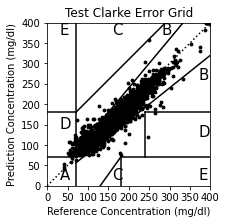

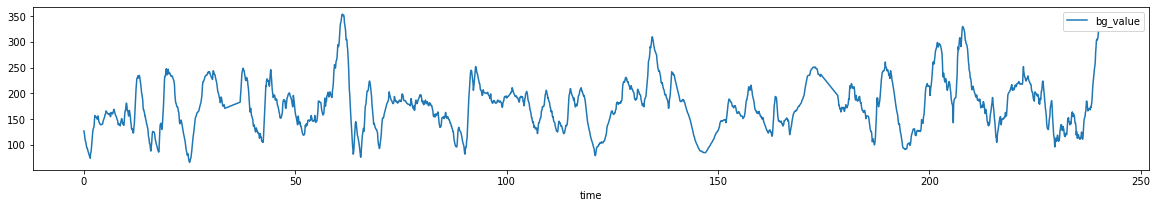

2021-07-03 12:54:58.233 | INFO     | src.helpers.experiment:create_tsfresh_dataframe:22 - Found existing picle file. Continuing...
2021-07-03 12:54:58.234 | INFO     | src.helpers.dataframe:read_df:11 - Attempting to read from pickle file dataframes/588_test_0_6_3.pkl
2021-07-03 12:54:59.330 | INFO     | __main__:run_model:28 - {'model': ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=1974, verbose=0, warm_start=False), 'model_name': 'ExtraTreesRegressor', 'internal_cga_analysis': [3585, 174, 0, 31, 0], 'internal_rmse': 14.257222752775222, 'internal_rmadex': 51.41730162403137, 'unseen_cga_analy

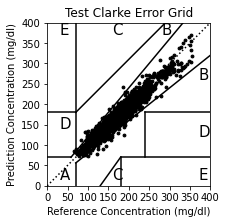

In [54]:
run_model(best3[1])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,8.9193,180.7640,13.4448,0.9276,0.0936,0.0615
1,9.2349,201.6852,14.2016,0.9270,0.1002,0.0641
2,9.2134,190.7182,13.8101,0.9201,0.0988,0.0647
3,9.8156,218.7686,14.7908,0.9199,0.0996,0.0645
4,9.2328,179.5649,13.4002,0.9274,0.0925,0.0618
5,9.2675,188.3827,13.7253,0.9330,0.0928,0.0628
6,8.8686,183.0145,13.5283,0.9242,0.0890,0.0576
7,9.1140,182.4572,13.5077,0.9286,0.0892,0.0601
8,9.1777,195.2152,13.9719,0.9240,0.0946,0.0610
9,9.3944,188.4771,13.7287,0.9222,0.0939,0.0631


2021-07-03 12:55:03.770 | INFO     | __main__:run_model:5 - Processing model: LGBMRegressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.3122,188.0616,13.7136,0.9252,0.0958,0.0628


2021-07-03 12:55:04.110 | INFO     | src.helpers.experiment:create_ds_name:12 - dataframes/588_test_0_6_3.pkl
2021-07-03 12:55:04.127 | INFO     | src.helpers.experiment:create_tsfresh_dataframe:19 - {'ohio_no': 588, 'scope': 'test', 'train_ds_size': 0, 'window_size': 6, 'prediction_horizon': 3, 'minimal_features': False}


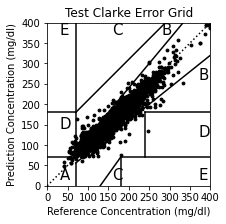

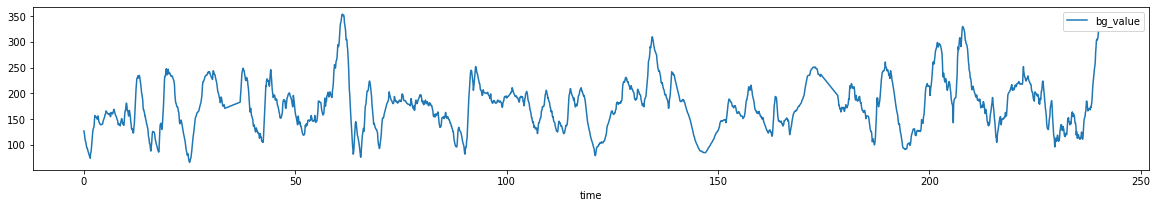

2021-07-03 12:55:04.392 | INFO     | src.helpers.experiment:create_tsfresh_dataframe:22 - Found existing picle file. Continuing...
2021-07-03 12:55:04.393 | INFO     | src.helpers.dataframe:read_df:11 - Attempting to read from pickle file dataframes/588_test_0_6_3.pkl
2021-07-03 12:55:05.428 | INFO     | __main__:run_model:28 - {'model': LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=1974, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), 'model_name': 'LGBMRegressor', 'internal_cga_analysis': [3610, 157, 0, 23, 0], 'internal_rmse': 13.713555206425204, 'internal_rmadex': 36.37222242012175, 'unseen_cga_analysis': [2743, 37, 0, 3, 0], 'unseen_

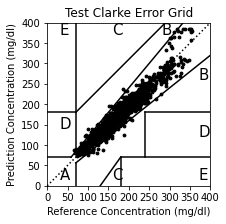

In [55]:
run_model(best3[2])

In [56]:
print(master_output)

{'GradientBoostingRegressor': {'model': GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1974, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False), 'model_name': 'GradientBoostingRegressor', 'internal_cga_analysis': [3600, 155, 0, 35, 0], 'internal_rmse': 13.760945020114189, 'internal_rmadex': 55.79699878040414, 'unseen_cga_analysis': [2744, 35, 0, 4, 0], 'unseen_rmse': 11.2907900615769, 'unseen_rmadex': 15.86956820044977}, 'ExtraTreesRe

In [57]:
pandas.DataFrame.from_dict(master_output, orient='index')

,model,model_name,internal_cga_analysis,internal_rmse,internal_rmadex,unseen_cga_analysis,unseen_rmse,unseen_rmadex
GradientBoostingRegressor,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",GradientBoostingRegressor,"[3600, 155, 0, 35, 0]",13.760945,55.796999,"[2744, 35, 0, 4, 0]",11.290790,15.869568
ExtraTreesRegressor,"(ExtraTreeRegressor(ccp_alpha=0.0, criterion='...",ExtraTreesRegressor,"[3585, 174, 0, 31, 0]",14.257223,51.417302,"[2734, 45, 0, 4, 0]",11.752822,16.726530
LGBMRegressor,"LGBMRegressor(boosting_type='gbdt', class_weig...",LGBMRegressor,"[3610, 157, 0, 23, 0]",13.713555,36.372222,"[2743, 37, 0, 3, 0]",11.829026,15.612883


In [58]:
def run_model2(model_to_run):
    output = {}
    model = create_model(model_to_run)
    model_name = model.__str__().split('(')[0]
    logger.info(f'Processing model: {model_name}')
    output['model'] = model
    output['model_name'] = model_name
    pd = predict_model(model)
    (_, res) = clarke_error_grid(pd['label'], pd['Label'], 'Test')
    output['internal_cga_analysis'] = res
    rmse = np.sqrt(mean_squared_error(pd['label'], pd['Label']))
    rmadex = np.sqrt(mean_adjusted_exponent_error(
        pd['label'], pd['Label']))
    output['internal_rmse'] = rmse
    output['internal_rmadex'] = rmadex

    unseen_df = create_tsfresh_dataframe(unseen_data_parameters)
    clean_unseen_df = unseen_df.drop(
        columns=['start', 'end', 'start_time', 'end_time'])
    unseen_pd = predict_model(model, data=clean_unseen_df)
    (_, res) = clarke_error_grid(unseen_pd['label'], unseen_pd['Label'], 'Test')
    
    output['unseen_cga_analysis'] = res
    rmse = np.sqrt(mean_squared_error(unseen_pd['label'], unseen_pd['Label']))
    rmadex = np.sqrt(mean_adjusted_exponent_error(
        unseen_pd['label'], unseen_pd['Label']))
    output['unseen_rmse'] = rmse
    output['unseen_rmadex'] = rmadex
    logger.info(output)
    master_output[model_name] = output
    return unseen_pd
    # df_array.append()

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,8.9675,179.8398,13.4104,0.9280,0.0944,0.0618
1,9.3309,192.6058,13.8783,0.9303,0.0971,0.0643
2,9.4836,201.7068,14.2024,0.9154,0.1006,0.0670
3,9.6234,209.5550,14.4760,0.9233,0.0979,0.0634
4,9.2008,174.8350,13.2225,0.9293,0.0917,0.0617
5,9.2300,182.1535,13.4964,0.9353,0.0926,0.0629
6,8.7691,183.5239,13.5471,0.9240,0.0909,0.0573
7,9.3407,189.3101,13.7590,0.9259,0.0916,0.0617
8,9.0215,185.9540,13.6365,0.9276,0.0908,0.0601
9,9.5957,196.5042,14.0180,0.9189,0.0972,0.0653


2021-07-03 12:56:03.261 | INFO     | __main__:run_model2:5 - Processing model: GradientBoostingRegressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,9.3583,189.3636,13.7609,0.9246,0.0967,0.0638


2021-07-03 12:56:03.599 | INFO     | src.helpers.experiment:create_ds_name:12 - dataframes/588_test_0_6_3.pkl
2021-07-03 12:56:03.617 | INFO     | src.helpers.experiment:create_tsfresh_dataframe:19 - {'ohio_no': 588, 'scope': 'test', 'train_ds_size': 0, 'window_size': 6, 'prediction_horizon': 3, 'minimal_features': False}


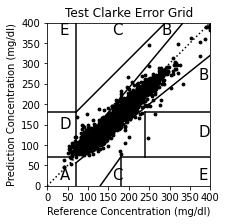

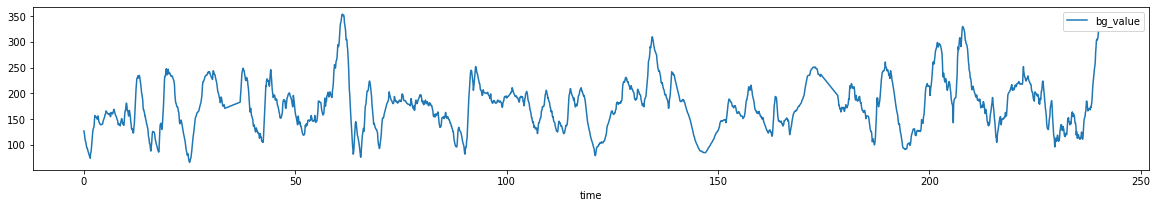

2021-07-03 12:56:03.880 | INFO     | src.helpers.experiment:create_tsfresh_dataframe:22 - Found existing picle file. Continuing...
2021-07-03 12:56:03.880 | INFO     | src.helpers.dataframe:read_df:11 - Attempting to read from pickle file dataframes/588_test_0_6_3.pkl
2021-07-03 12:56:04.911 | INFO     | __main__:run_model2:29 - {'model': GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1974, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=

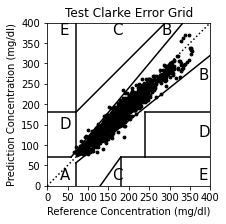

In [59]:
res0 = run_model2(best3[0])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d560f233-0034-499f-bc4e-7ada8795cb9f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>

In [60]:
res0.head()

,bg_value__variance_larger_than_standard_deviation,bg_value__has_duplicate_max,bg_value__has_duplicate_min,bg_value__has_duplicate,bg_value__sum_values,bg_value__abs_energy,bg_value__mean_abs_change,bg_value__mean_change,bg_value__mean_second_derivative_central,bg_value__median,...,bg_value__permutation_entropy__dimension_7__tau_1,bg_value__query_similarity_count__query_None__threshold_0.0,"bg_value__matrix_profile__feature_""min""__threshold_0.98","bg_value__matrix_profile__feature_""max""__threshold_0.98","bg_value__matrix_profile__feature_""mean""__threshold_0.98","bg_value__matrix_profile__feature_""median""__threshold_0.98","bg_value__matrix_profile__feature_""25""__threshold_0.98","bg_value__matrix_profile__feature_""75""__threshold_0.98",label,Label
0,1.0,0.0,0.0,0.0,694.0,80626.0,4.2,-4.2,0.250,115.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95,100.042671
1,1.0,0.0,0.0,0.0,670.0,75106.0,4.0,-4.0,0.250,110.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93,97.224970
2,1.0,0.0,0.0,0.0,645.0,69581.0,4.0,-4.0,0.125,107.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93,89.207365
3,1.0,0.0,0.0,0.0,622.0,64682.0,3.4,-3.4,0.125,104.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89,86.592035
4,1.0,0.0,0.0,0.0,603.0,60787.0,3.0,-3.0,0.000,100.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87,86.587317


In [61]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams["figure.figsize"] = (20,3)


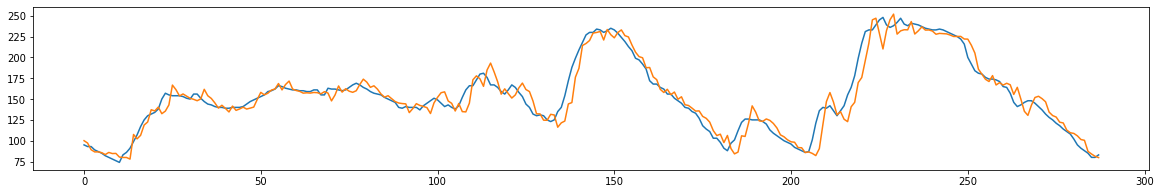

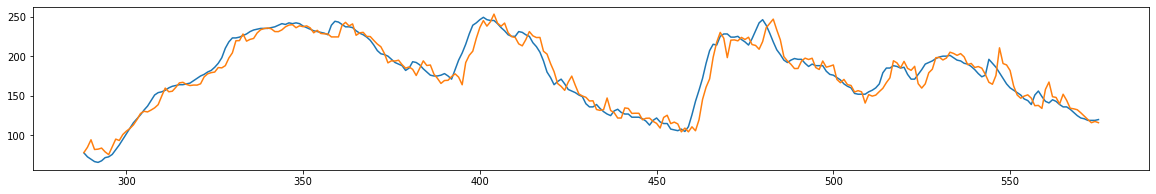

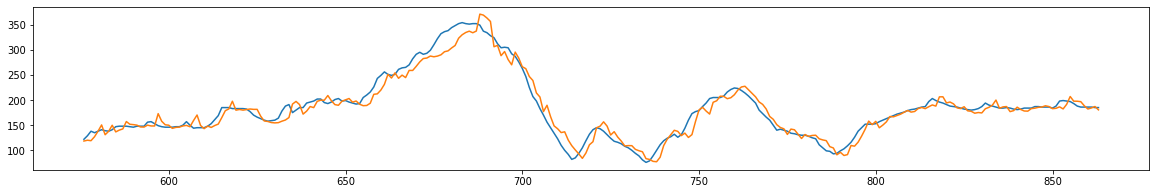

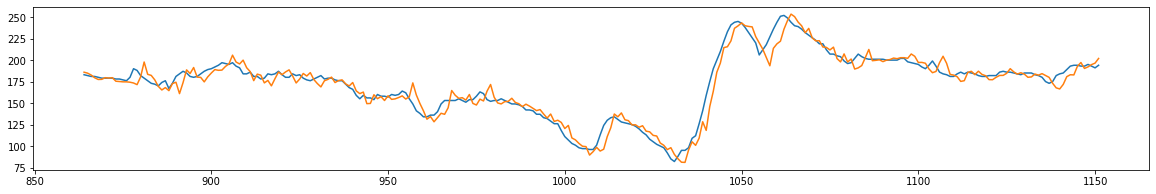

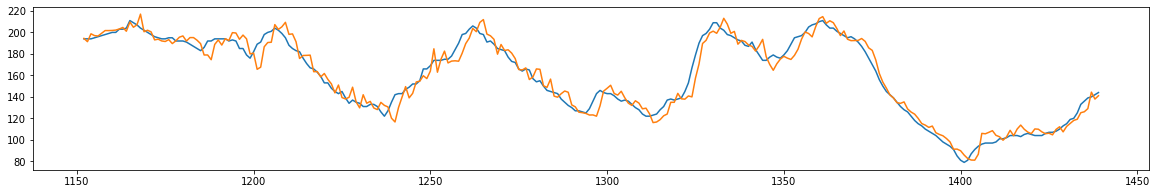

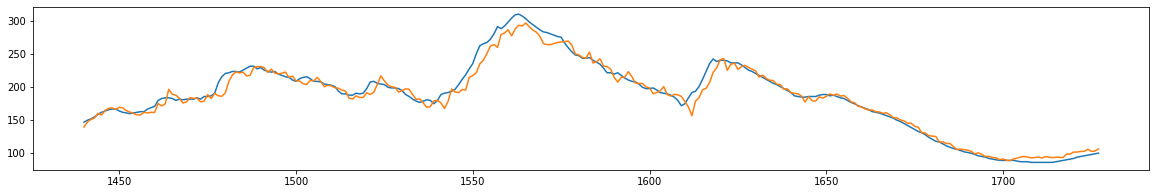

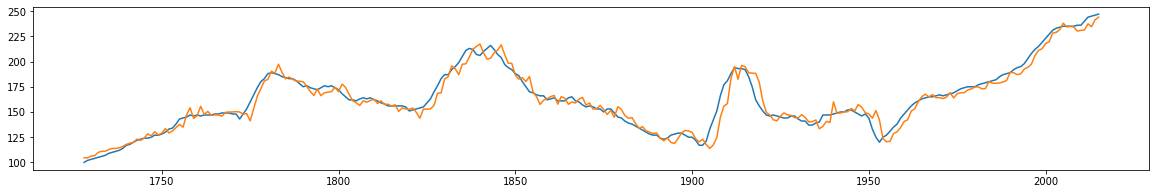

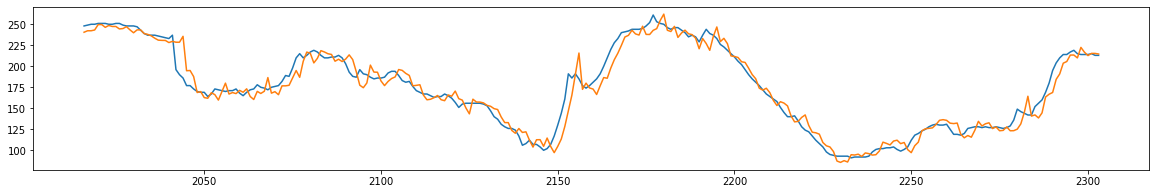

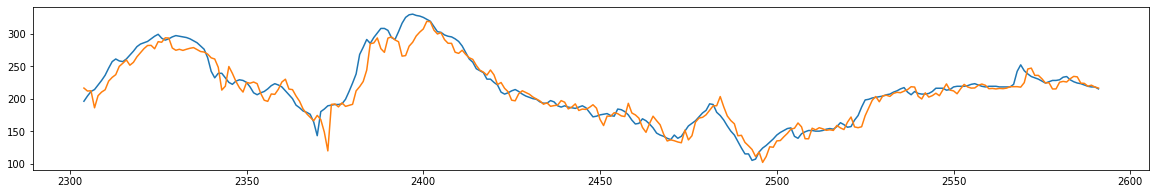

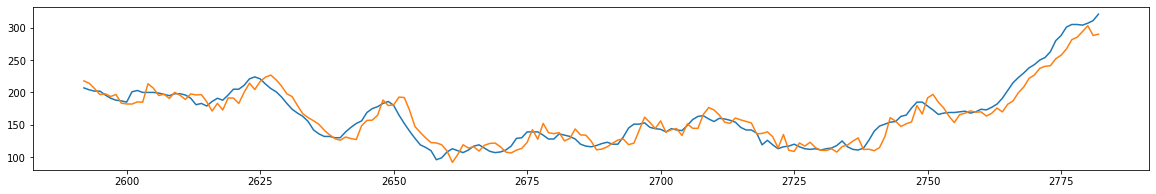

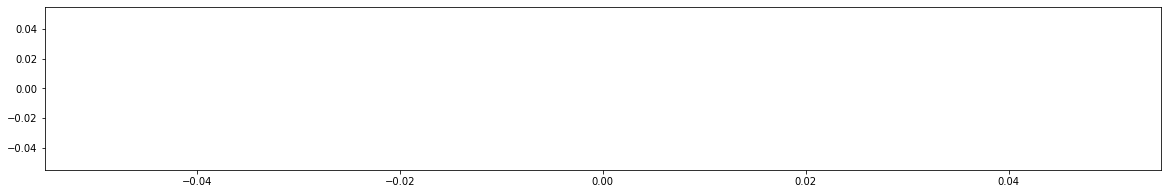

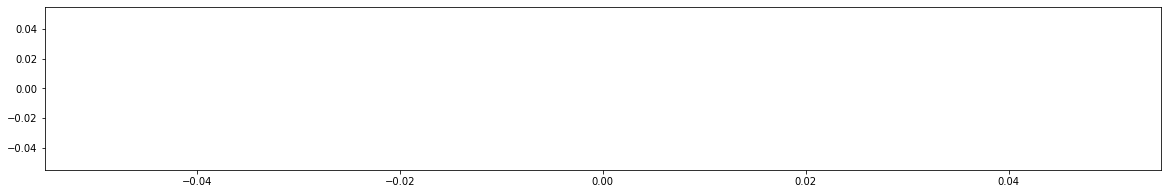

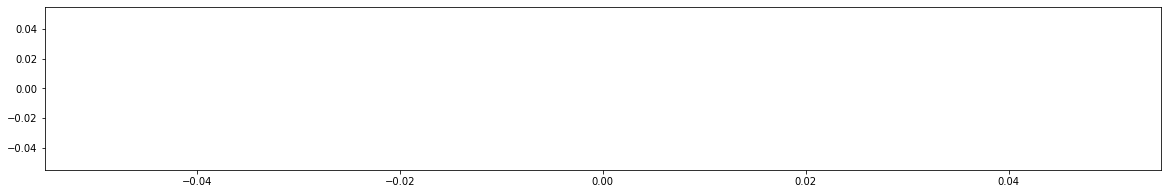

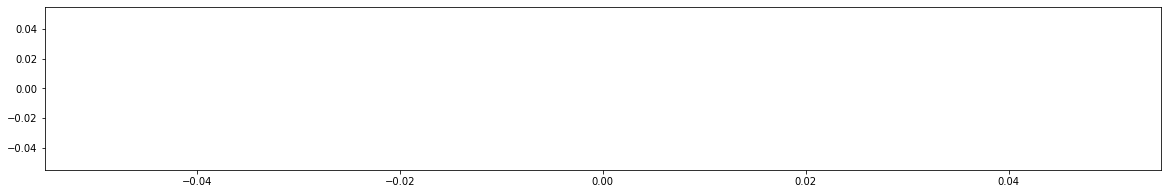

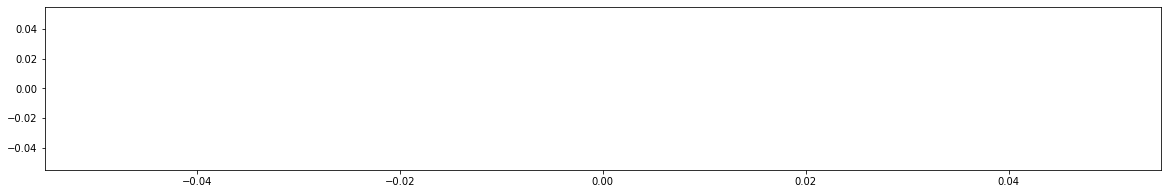

In [63]:
for i in range(0,15):
    plt.plot(res0['label'][i*288:(i+1)*288],label='True')
    plt.plot(res0['Label'][i*288:(i+1)*288],label='Predicted')
#     plt.legend(['test'])
    plt.show()
